In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
def pca(X):
    w, v = np.linalg.eig(X.T @ X)
    sigmas = np.sqrt(w)
    indexes = np.flip(np.argsort(sigmas))
    sigmas = sigmas[indexes]
    v = v[:, indexes]
    Q = v.T
    print(Q)
    variance = np.sqrt(1./(X.shape[0] - 1)) * sigmas
    return Q, variance, sigmas

In [3]:
def get_normalized_data_matrix(X):
    m = X.shape[0]
    A = (np.eye(m) - 1./m * np.ones((m, m))) @ X
    return A

In [4]:
data = pd.read_csv("wdbc.data")
data = np.array(data)
cancer = data[:, 1]
cancer = list(cancer)
cancer.insert(0, 'M')
data = data[:, 2 :]
data = np.array(data, dtype=float)
first = [17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189]
data = list(data)
data.insert(0, first)
data = np.array(data)

In [5]:
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)
A = get_normalized_data_matrix(data)
Q, variance, sigmas = pca(A)

[[ 2.18902444e-01  1.03724578e-01  2.27537293e-01  2.20994985e-01
   1.42589694e-01  2.39285354e-01  2.58400481e-01  2.60853758e-01
   1.38166959e-01  6.43633464e-02  2.05978776e-01  1.74280281e-02
   2.11325916e-01  2.02869635e-01  1.45314521e-02  1.70393451e-01
   1.53589790e-01  1.83417397e-01  4.24984216e-02  1.02568322e-01
   2.27996634e-01  1.04469325e-01  2.36639681e-01  2.24870533e-01
   1.27952561e-01  2.10095880e-01  2.28767533e-01  2.50885971e-01
   1.22904556e-01  1.31783943e-01]
 [-2.33857132e-01 -5.97060883e-02 -2.15181361e-01 -2.31076711e-01
   1.86113023e-01  1.51891610e-01  6.01653628e-02 -3.47675005e-02
   1.90348770e-01  3.66575471e-01 -1.05552152e-01  8.99796818e-02
  -8.94572342e-02 -1.52292628e-01  2.04430453e-01  2.32715896e-01
   1.97207283e-01  1.30321560e-01  1.83848000e-01  2.80092027e-01
  -2.19866379e-01 -4.54672983e-02 -1.99878428e-01 -2.19351858e-01
   1.72304352e-01  1.43593173e-01  9.79641143e-02 -8.25723507e-03
   1.41883349e-01  2.75339469e-01]
 [-8.5

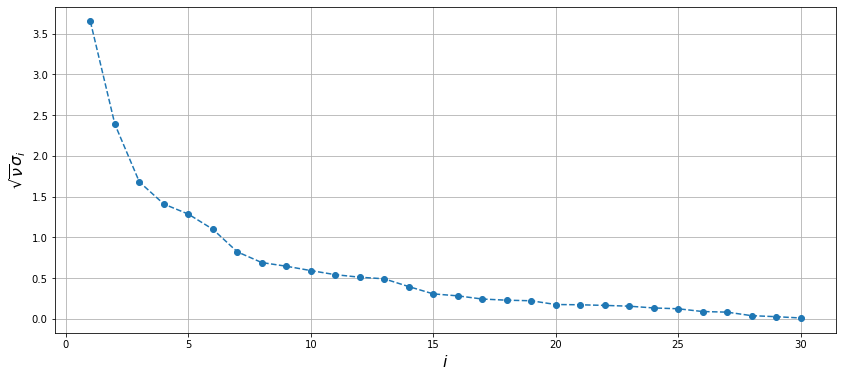

In [6]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(1. + np.arange(len(variance)), variance, 'o--')
ax.set_xlabel(r'$i$', fontsize=16)
ax.set_ylabel(r'$\sqrt{\nu} \sigma_i$', fontsize=16)
ax.grid()
plt.savefig("variance.png")

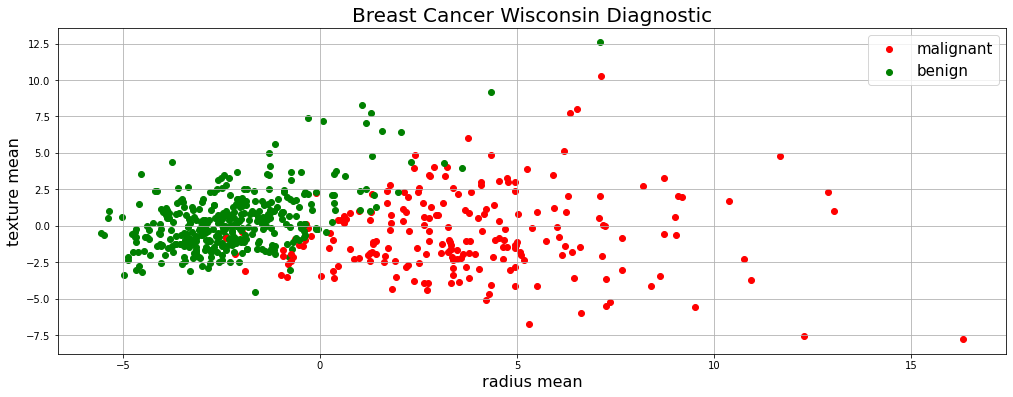

In [7]:
Q_k = Q[:2]
A_k = A @ Q_k.T
fig, ax = plt.subplots(figsize=(17, 6))

for i in range(len(cancer)):
    if cancer[i] == 'M':
        red = ax.scatter(A_k[i][0], A_k[i][1], color='red')
    else:
        green = ax.scatter(A_k[i][0], A_k[i][1], color='green')

ax.set_xlabel(r'radius mean', fontsize=16)
ax.set_ylabel(r'texture mean', fontsize=16)
plt.title('Breast Cancer Wisconsin Diagnostic', fontsize=20)
ax.legend([red, green], ['malignant', 'benign'], loc='upper right', fontsize=15)
ax.grid()
plt.savefig("cancer.png")

In [8]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=30)
# pca.fit(A)
# print(pca.components_)
# print(pca.singular_values_)
# Q = np.array(Q, dtype=float)
# components_ = np.array(pca.components_, dtype=float)
# print(np.allclose(Q, components_))
# sigmas = np.array(sigmas, dtype=float)
# singular_values_ = np.array(pca.singular_values_, dtype=float)
# print(np.allclose(sigmas, singular_values_))